# Getting to grips with SQL


This project provides me with an opportunity to become accustomed to working with SQL and also practice interfacing SQL with pandas and matplotlib. <br>
i'll analyse the  'CIA world factbook', which includes economic, population and geographical data obtained by the CIA for different countries around the world

In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
conn = sql.connect('factbook.db')

In [3]:
info = pd.read_sql_query('select * from sqlite_master where type="table"',conn )

In [4]:
# the table's name within the database is 'facts'
info

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
# return first 5 rows from 'facts'
query = 'select * from facts limit 5'
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# Analyzing the data

Take a look at the data to find any patterns and extract some factual information

In [6]:
#min/max population 
min_pop = pd.read_sql_query('select MIN(population) from facts', conn)
max_pop = pd.read_sql_query('select MAX(population) from facts', conn)

#min/max population growth
min_pop_growth = pd.read_sql_query('select MIN(population_growth) from facts', conn)
max_pop_growth = pd.read_sql_query('select MAX(population_growth) from facts', conn)

In [7]:
print(min_pop)
print(max_pop)
print(min_pop_growth)
print(max_pop_growth)


   MIN(population)
0                0
   MAX(population)
0       7256490011
   MIN(population_growth)
0                     0.0
   MAX(population_growth)
0                    4.02


interestingly there is a country within the table with a population of zero and another with a population almost as great as earth, this needs to be checked out.

In [8]:
# the country/countries with not a single person living there
query = 'select * from facts where population == (select MIN(population) from facts)'
zero_pop_countries = pd.read_sql_query(query, conn)

In [9]:
zero_pop_countries

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


This makes sense now <br>
from Wiki <br>
<b> "Antarctica has no permanent residents, and contains research stations and field camps that are staffed seasonally or year-round, and former whaling settlements. The largest station, McMurdo Station, has a summer population of about 1,000 people and a winter population of about 200."<b>

In [10]:
# the country/countries with '7 billion people'
query = 'select * from facts where population == (select MAX(population) from facts)'
too_big_pop = pd.read_sql_query(query, conn)

In [11]:
too_big_pop

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


This row clearly corresponds to the entire world, and it appears that some of the numerical data has been obtained by means of aggregation of all the individual countries data

# Visualizing

In [12]:
# plot the population,population_growth,birth_rate,death_rate as histograms 
# to compare countries in all these domains, neglect 'antartica' and 'world'

query = 'select name, population, population_growth, birth_rate, death_rate from facts where name not in ("Antarctica", "World")'
countries_pop_stats = pd.read_sql_query(query, conn)

In [13]:
countries_pop_stats.set_index('name')


,population,population_growth,birth_rate,death_rate
name,,,,
Afghanistan,32564342.0,2.32,38.57,13.89
Albania,3029278.0,0.30,12.92,6.58
Algeria,39542166.0,1.84,23.67,4.31
Andorra,85580.0,0.12,8.13,6.96
Angola,19625353.0,2.78,38.78,11.49
Antigua and Barbuda,92436.0,1.24,15.85,5.69
Argentina,43431886.0,0.93,16.64,7.33
Armenia,3056382.0,0.15,13.61,9.34
Australia,22751014.0,1.07,12.15,7.14


In [14]:
countries_pop_stats.head(5)

,name,population,population_growth,birth_rate,death_rate
0,Afghanistan,32564342.0,2.32,38.57,13.89
1,Albania,3029278.0,0.30,12.92,6.58
2,Algeria,39542166.0,1.84,23.67,4.31
3,Andorra,85580.0,0.12,8.13,6.96
4,Angola,19625353.0,2.78,38.78,11.49


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

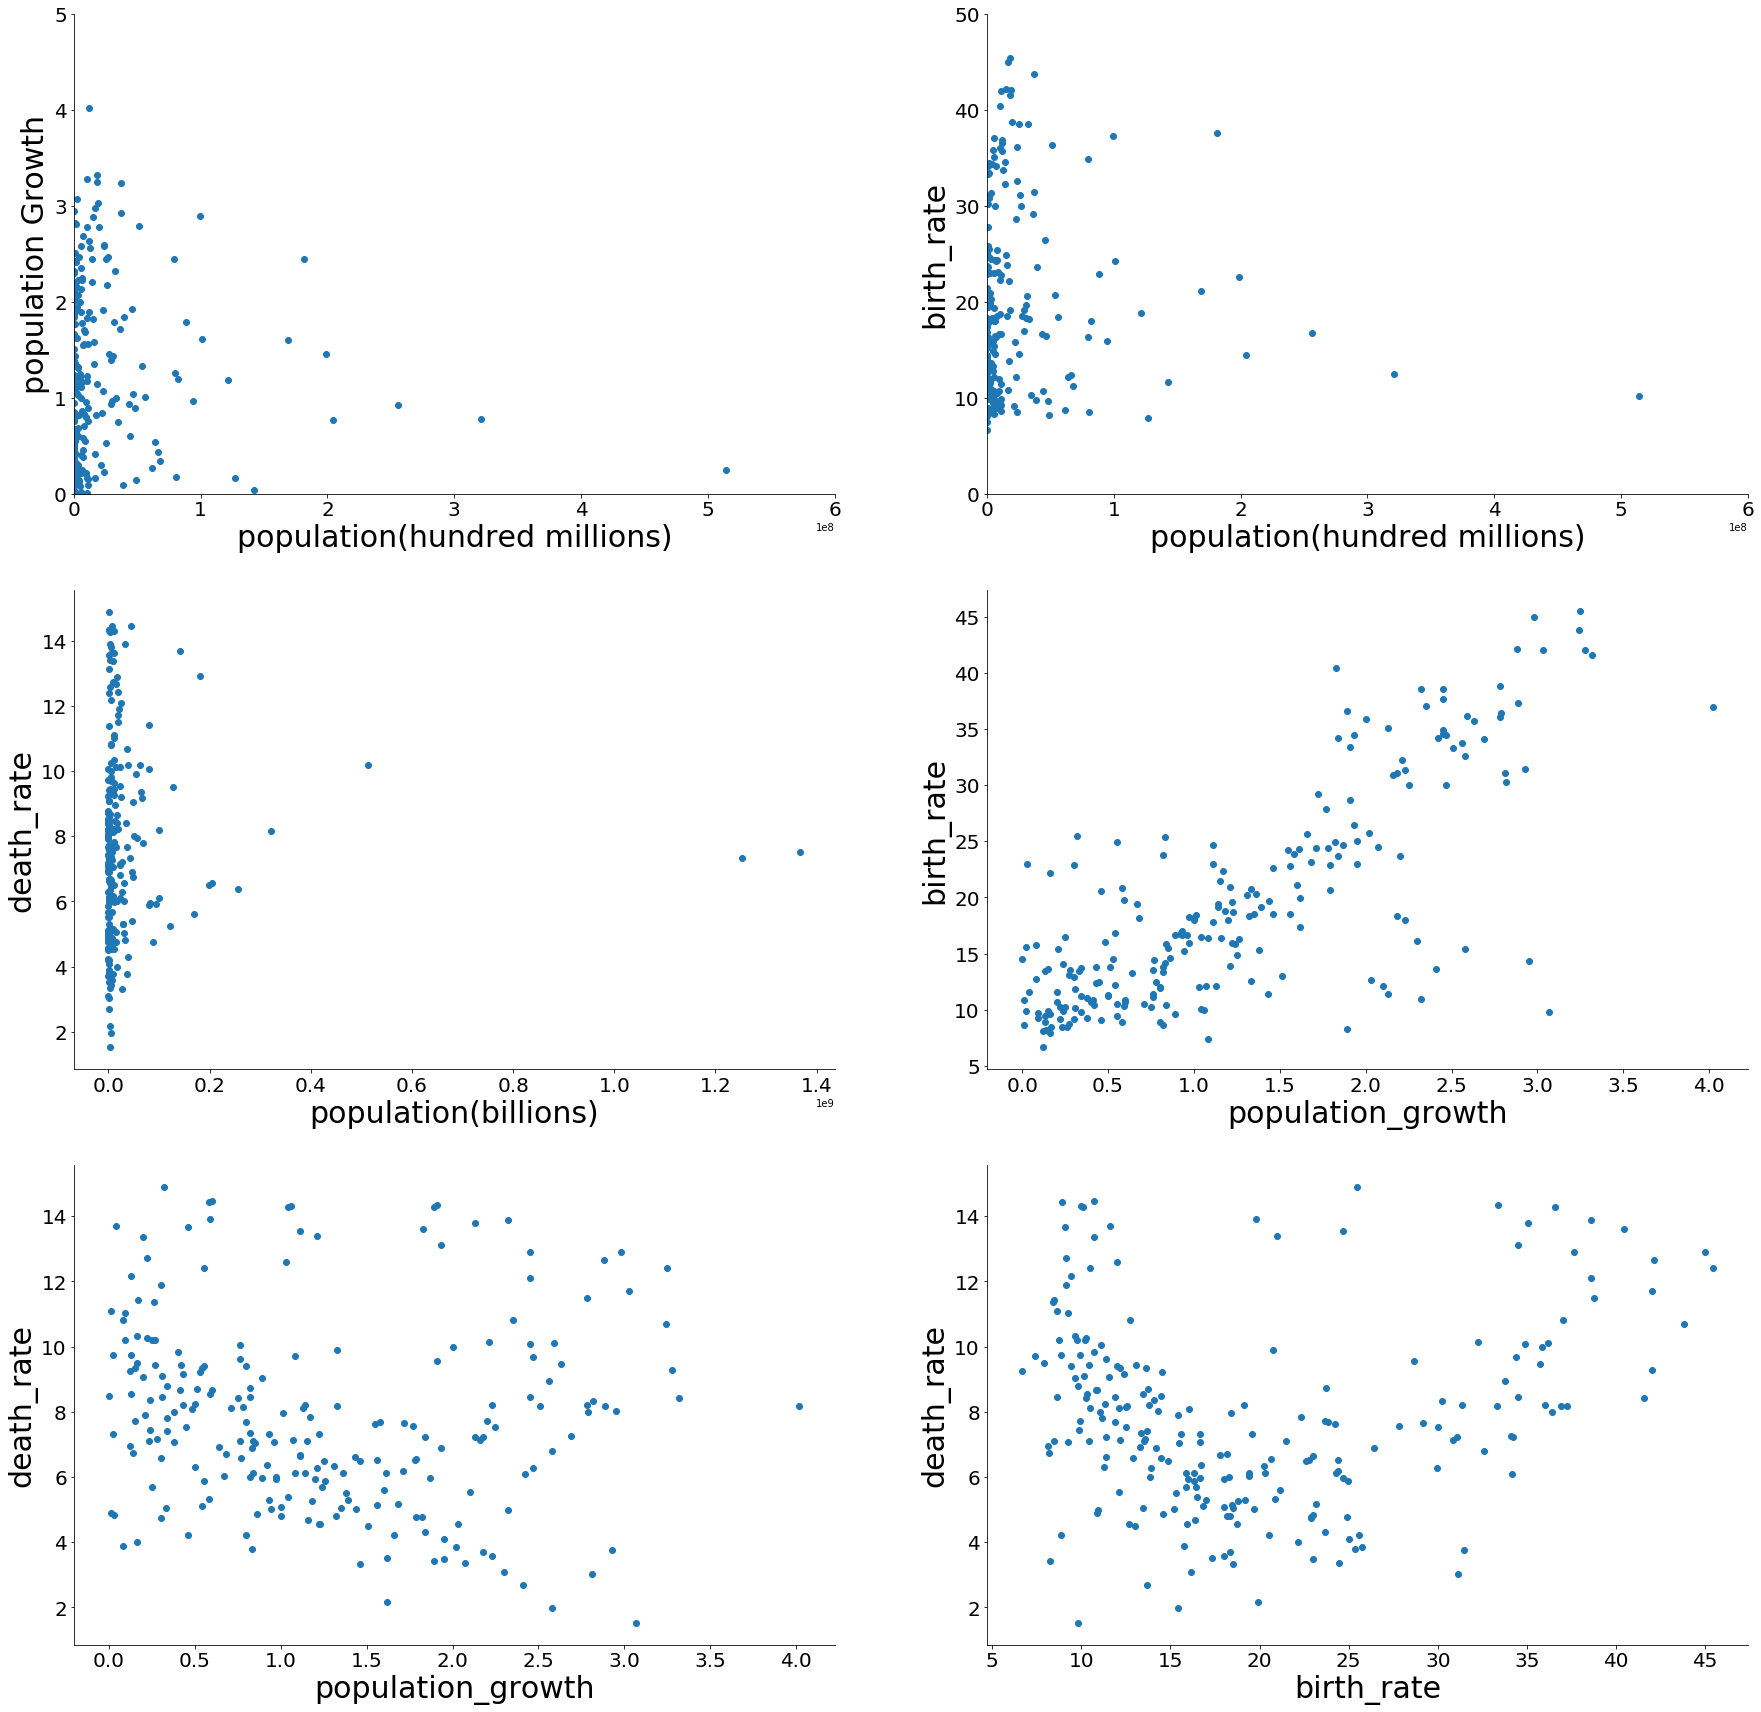

In [16]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
#plot1
ax.scatter(countries_pop_stats['population'], countries_pop_stats['population_growth'],
       )
ax.set_xlabel('population(hundred millions)',fontsize=30)
ax.set_ylabel('population Growth', fontsize=30)
ax.tick_params(labelsize=20)
ax.axis([0,600000000,0,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plot2
ax2.scatter(countries_pop_stats['population'], countries_pop_stats['birth_rate'],
       )
ax2.set_xlabel('population(hundred millions)', fontsize=30)
ax2.set_ylabel('birth_rate',fontsize=30)
ax2.tick_params(labelsize=20)
ax2.axis([0,600000000,0,50])
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


#plot3
ax3.scatter(countries_pop_stats['population'], countries_pop_stats['death_rate'],
       )
ax3.set_xlabel('population(billions)',fontsize=30)
ax3.set_ylabel('death_rate',fontsize=30)
ax3.tick_params(labelsize=20)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

#plot4
ax4.scatter(countries_pop_stats['population_growth'], countries_pop_stats['birth_rate'],
       )
ax4.set_xlabel('population_growth',fontsize=30)
ax4.set_ylabel('birth_rate',fontsize=30)
ax4.tick_params(labelsize=20)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

#plot5
ax5.scatter(countries_pop_stats['population_growth'], countries_pop_stats['death_rate'],
       )
ax5.set_xlabel('population_growth',fontsize=30)
ax5.set_ylabel('death_rate',fontsize=30)
ax5.tick_params(labelsize=20)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

#plot6
ax6.scatter(countries_pop_stats['birth_rate'], countries_pop_stats['death_rate'],
       )
ax6.set_xlabel('birth_rate',fontsize=30)
ax6.set_ylabel('death_rate',fontsize=30)
ax6.tick_params(labelsize=20)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

Not really much to be said about this, Birth_rate obviously correlates strongly with population growth.

Strangely it seems death rate AND birthrate dont seem to correlate that strongly with population

## Population density

In [17]:
#The top 5 most dense countries
query = 'select name, cast(population as float)/cast(area_land as float) as "density" from facts'
query = query + ' order by density desc limit 5'
densities = pd.read_sql_query(query, conn)

In [18]:
densities

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444


In [19]:
macau_stats = pd.read_sql_query('select * from facts where name == "Macau"',conn)

In [20]:
#check figures
macau_stats

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,205,mc,Macau,28,28,0,592731,0.8,8.88,4.22,3.37,2015-11-01 13:36:27.392999,2015-11-01 13:36:27.392999


In [21]:
print(592731/28)

21168.964285714286


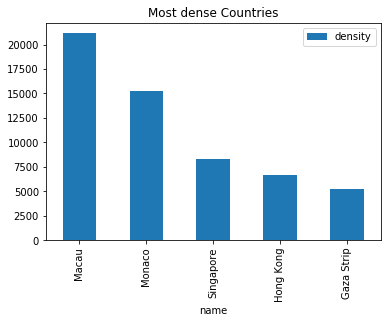

In [22]:
densities.plot(kind='bar', x='name', title='Most dense Countries')

In [23]:
pandas_df = pd.read_sql_query('select * from facts', conn)

In [24]:
pandas_df['density'] = pandas_df['population']/pandas_df['area_land']

In [25]:
import seaborn as sns

In [26]:
pandas_df['density'].value_counts(dropna=False).head(2)


NaN          27
98.011984     1
Name: density, dtype: int64

it has not been possible to calculate the densities for some of countries<br>
<b> One assumes it is because in some rows, either the land area OR the population is a NAN, lets check

In [27]:
#The missing densities
null_densities = pandas_df['density'].isnull()

In [28]:
#rows with land area OR pop missing
area_or_pop_null = pandas_df['area_land'].isnull() | pandas_df['population'].isnull()

In [29]:
(area_or_pop_null == null_densities).value_counts(dropna=False)

True    261
dtype: int64

<b> We can see that in every case, a missing density corresponds to one or both of land area/ population being missing. <br>
<b> With more knowledge of web scraping I could perhaps fill these values with numbers sourced from the web. In this case, with my current knowledge I shall instead set them equal to 0

In [30]:
 pandas_df.loc[null_densities,'density'] = 0

In [31]:
pandas_df['density'].value_counts(dropna=False).head(2)


0.00000     28
47.94199     1
Name: density, dtype: int64

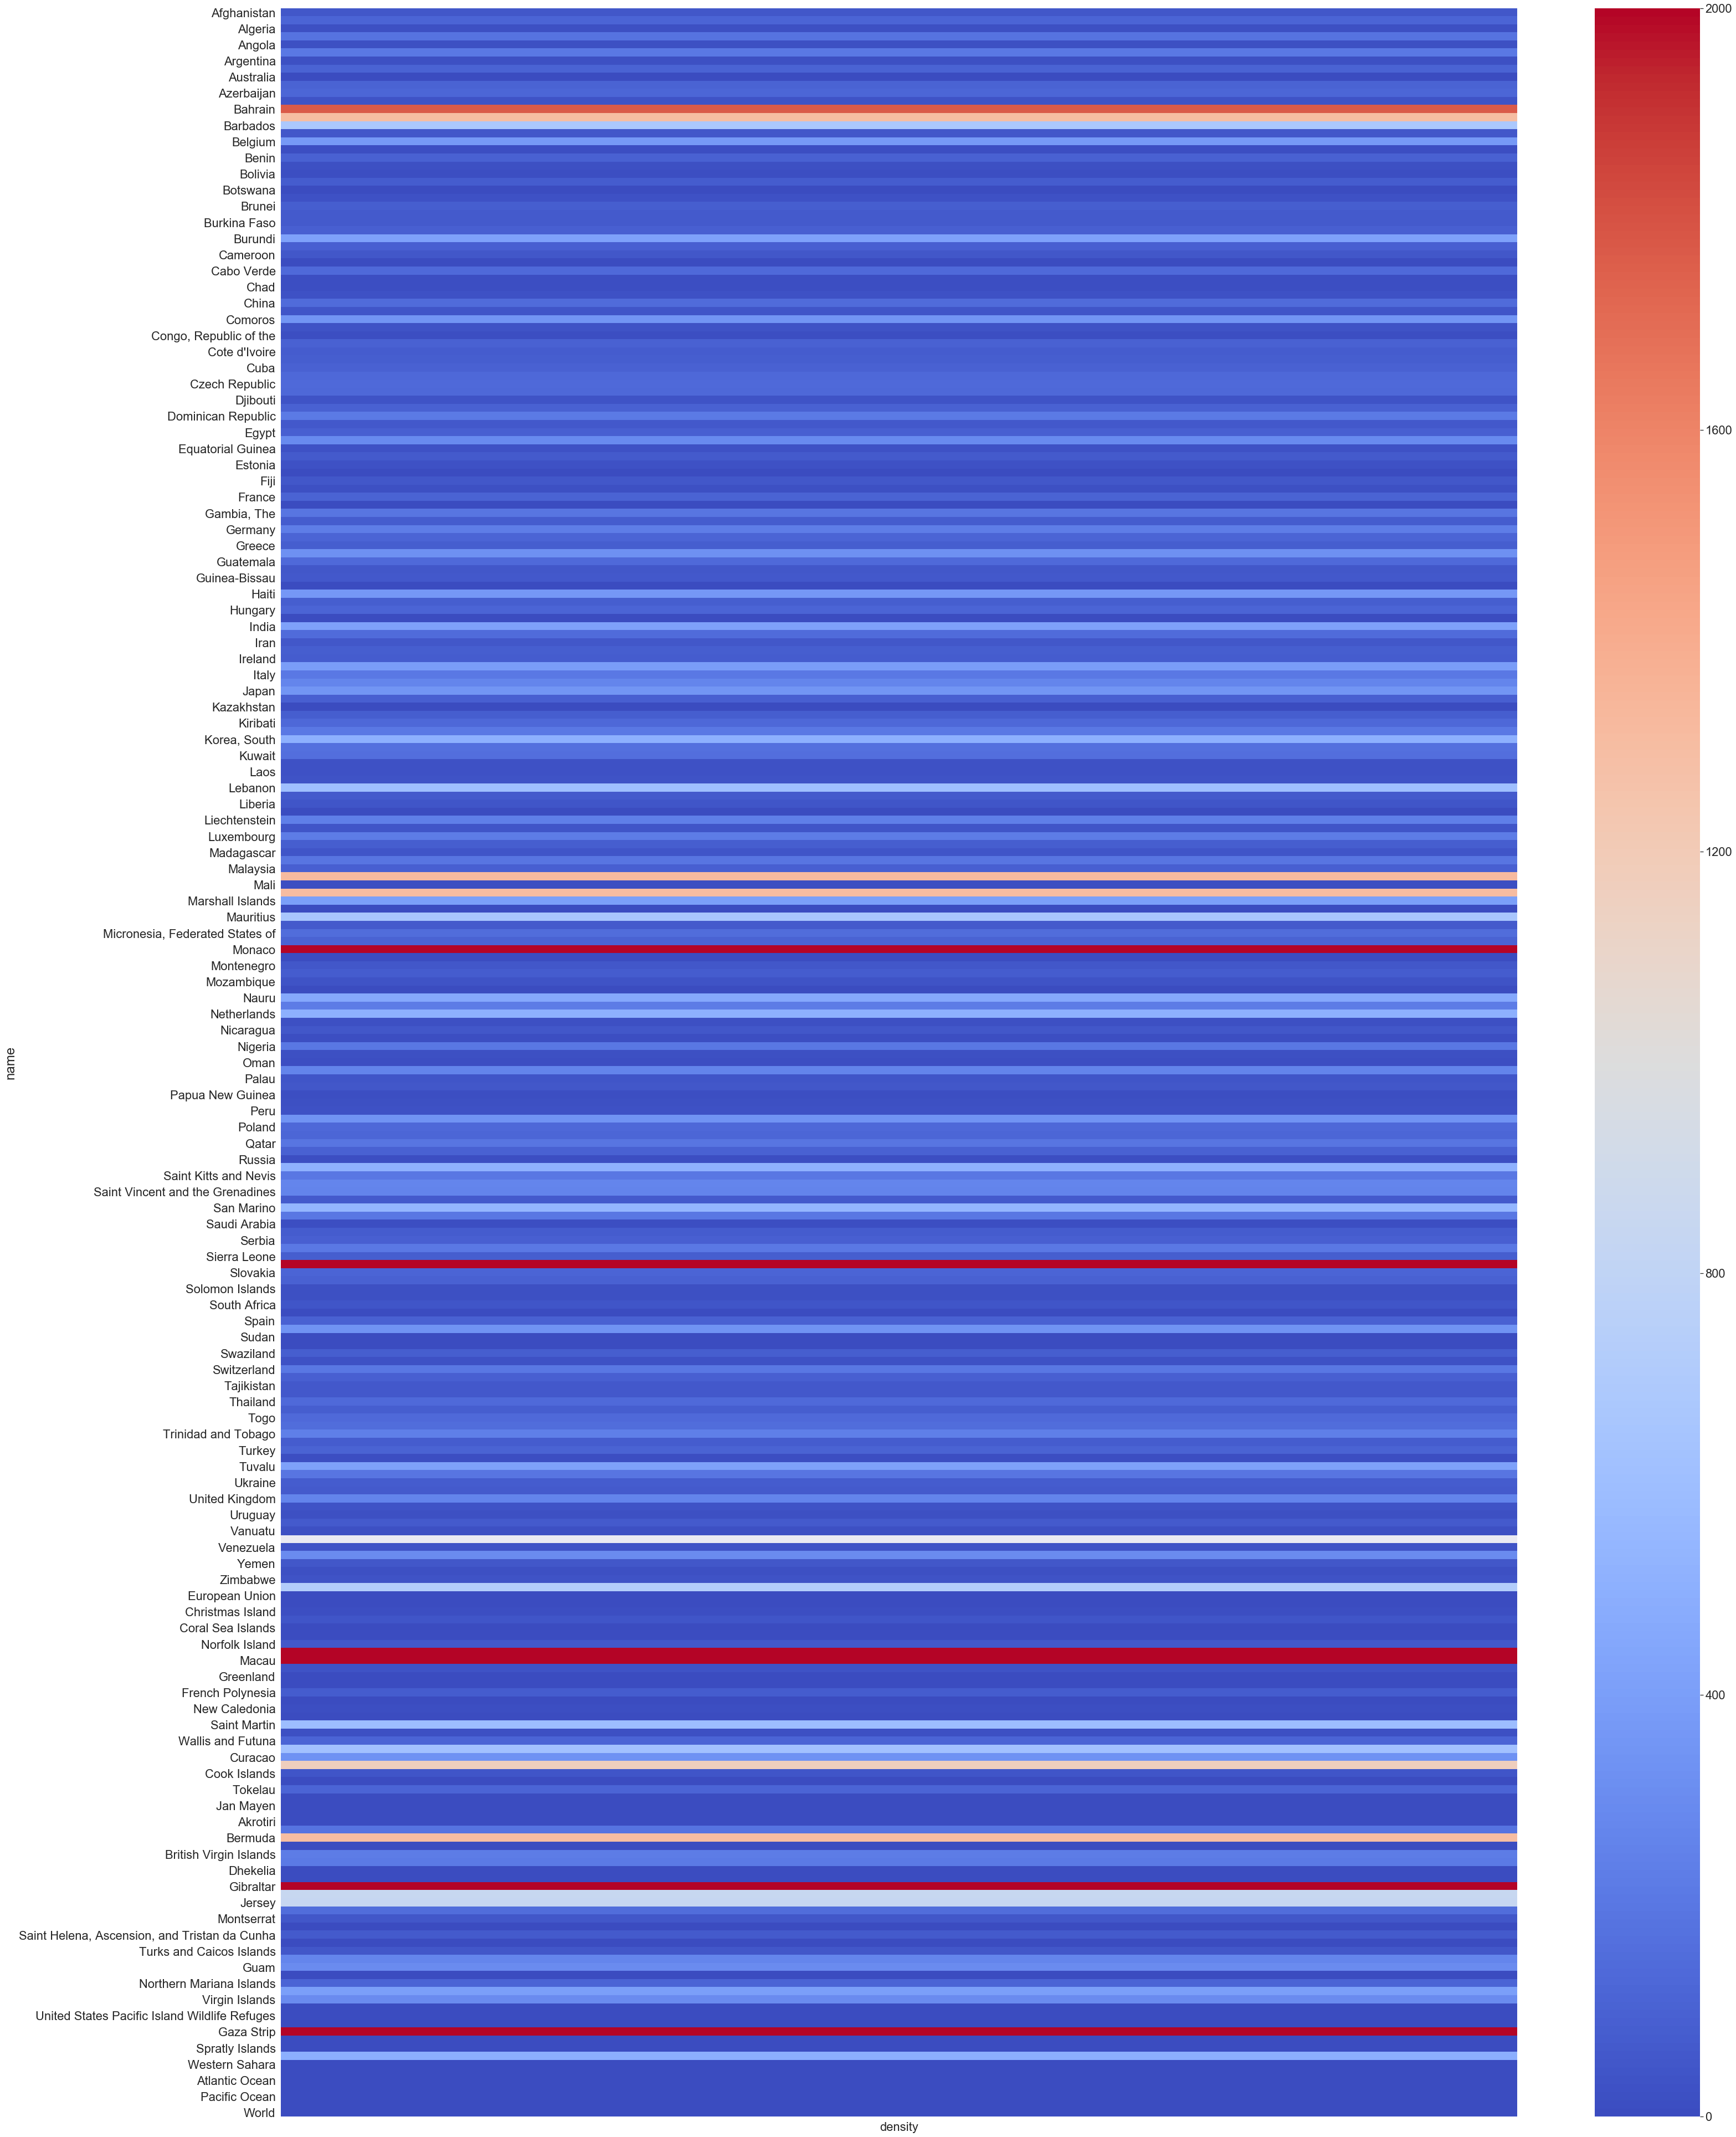

In [41]:
#POPULATION DENSITY HEATMAP
dense=pandas_df[['name', 'density']].set_index('name')
fig,ax=plt.subplots(figsize=(50,70))
sns.set(font_scale=2.0)
sns.heatmap(dense, ax=ax, vmin=0, vmax=2000, cmap='coolwarm')



# END
<br>
A brief project to get used to reading SQL data into pandas and then visualizing/comprehending it

In [34]:
pandas_df[['name', 'density']]

,name,density
0,Afghanistan,49.927697
1,Albania,110.565662
2,Algeria,16.602211
3,Andorra,182.863248
4,Angola,15.741841
5,Antigua and Barbuda,209.131222
6,Argentina,15.870225
7,Armenia,108.370812
8,Australia,2.961485
9,Austria,105.107041
